# Problem 1

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Random Forest:
    
    it is a collection of decision trees models.

In [4]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# Creating Caterogical data on Sales Variable :

print("Length of Sales Variable : ",len(data["Sales"]))
print("Mean of Sales Variable : ",data["Sales"].mean())
data["Sales"].sort_values()

Length of Sales Variable :  400
Mean of Sales Variable :  7.496325


174     0.00
106     0.16
165     0.37
143     0.53
57      0.91
       ...  
18     13.91
367    14.37
25     14.90
316    15.63
376    16.27
Name: Sales, Length: 400, dtype: float64

In [8]:
data["highsales"] = np.where((data["Sales"] < 9),"Low","High")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [9]:
data["highsales"].describe()

count     400
unique      2
top       Low
freq      286
Name: highsales, dtype: object

In [10]:
data_new = data.iloc[:,1:]
data_new

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [11]:
#Complete Company dataset :

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data_new["ShelveLoc"]= label_encoder.fit_transform(data_new["ShelveLoc"])
data_new["Urban"]= label_encoder.fit_transform(data_new["Urban"])
data_new["US"]= label_encoder.fit_transform(data_new["US"])
data_new["highsales"]= label_encoder.fit_transform(data_new["highsales"])

data_new.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [12]:
array = data_new.values
X = array[:,:-1]
y = array[:,-1]

In [13]:
# Splitting data into train and test dataset :
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [14]:
# Creating Model :

model = RandomForestClassifier(n_estimators = 100, max_features = 4)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=4)

In [15]:
# Prediction and Accuracy on train dataset :

predict = model.predict(X_train)
pd.Series(predict).value_counts()

1    230
0     90
dtype: int64

In [16]:
pd.crosstab(y_train,predict)

col_0,0,1
row_0,,
0,90,0
1,0,230


In [17]:
# Accuracy :
np.mean(predict == y_train)

1.0

In [18]:
# Prediction and Accuracy on train dataset :

predict = model.predict(X_test)
pd.Series(predict).value_counts()

1    58
0    22
dtype: int64

In [19]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
0,19,5
1,3,53


In [20]:
# Accuracy :
np.mean(predict == y_test)

0.9

In [21]:
# Get Importance Feature :

importance = model.feature_importances_
importance

array([0.11758332, 0.0892315 , 0.13559098, 0.09046907, 0.23293672,
       0.11187029, 0.1231351 , 0.05744683, 0.01255401, 0.02918217])

<AxesSubplot:>

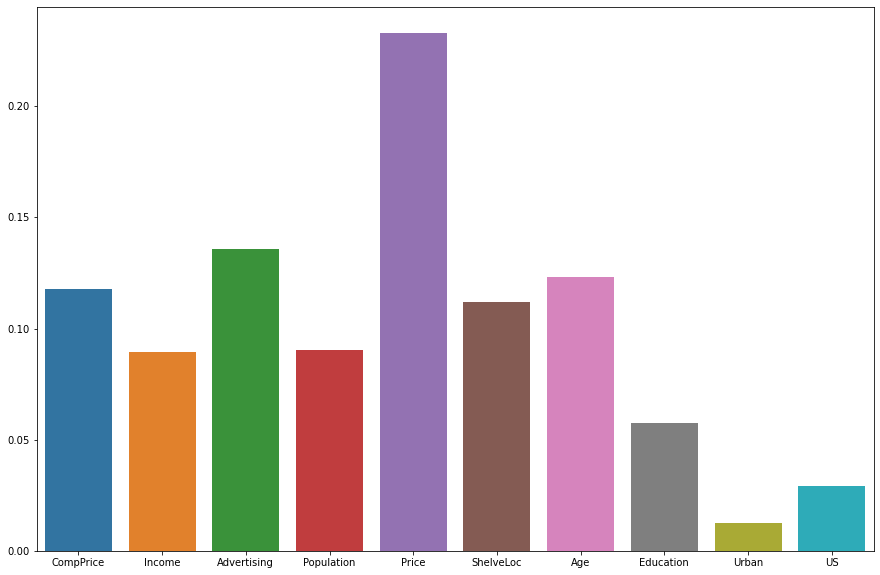

In [22]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"],y=model.feature_importances_)

# Problem 2

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data1 = pd.read_csv("Fraud_check.csv")
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [26]:
##Converting the Taxable income variable to bucketing. 
data1["income"]="<=30000"
data1.loc[data1["Taxable.Income"]>=30000,"income"]="Good"
data1.loc[data1["Taxable.Income"]<=30000,"income"]="Risky"

In [27]:
# Droping the Taxable income variable :
data1.drop(["Taxable.Income"],axis=1,inplace=True)

In [28]:
data1.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
data1

,undergrad,marital,population,experience,urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [29]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data1.columns:
    if data1[column_name].dtype == object:
        data1[column_name] = le.fit_transform(data1[column_name])
    else:
        pass

In [30]:
data1.tail()

,undergrad,marital,population,experience,urban,income
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0
599,0,0,158137,16,0,0


In [31]:
data1["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

In [32]:
# Splitting the data into featuers and labels :
features = data1.iloc[:,0:5]
labels = data1.iloc[:,5]

In [33]:
# Collecting the column names :
colnames1 = list(data1.columns)
predictors1 = colnames1[0:5]
target1 = colnames1[5]

In [34]:
# Splitting data into training and testing data set

from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(features,labels,test_size = 0.2,random_state=42)

In [35]:
# Model building :
from sklearn.datasets import make_classification
x1, y1 = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)


from sklearn.ensemble import RandomForestClassifier as RF
model1 = RF(max_depth=2, random_state=0)
model1.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [36]:
# Predictions on train data :
prediction1 = model1.predict(x1_train)

In [37]:
# Accuracy :
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y1_train,prediction1)
accuracy1

0.7958333333333333

In [38]:
# Prediction on test data :
pred1_test = model1.predict(x1_test)

In [39]:
# Accuracy :
acc1_test =accuracy_score(y1_test,pred1_test)
acc1_test

0.7833333333333333

In [41]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion1 = confusion_matrix(y1_train,prediction1)

In [42]:
confusion1

array([[382,   0],
       [ 98,   0]], dtype=int64)